In [1]:
import flopy
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from skimage.draw import polygon

In [5]:
c = ['+', '+02']
a = int(c[1][1:])
print(10**a)

100


In [8]:
path = 'choshui_original.bas'      #boundary檔
l=0
startingHd = []
layer = []
b = []

with open(path) as f:
    for line in f.readlines():
        if 'HEADS' in line:
            l += 1
        
        elif l>0:
            s = line.split(' ')

            for j in s:
                if j != '' :
                    k = j.split('e')
                    value = float(k[0])
                    if k[1][0] == '+':
                        b.append(value*(10**int(k[1][1:])))
                    else:
                        b.append(value*(10**-int(k[1][1:])))

            if len(b) >= 309:
                layer.append(b)
                b=[]

            if len(layer) >= 400:
                startingHd.append(layer)
                layer  =[]

            if len(startingHd) == 9:
                break


startingHd = np.array(startingHd)
print(startingHd.shape)

(9, 400, 309)


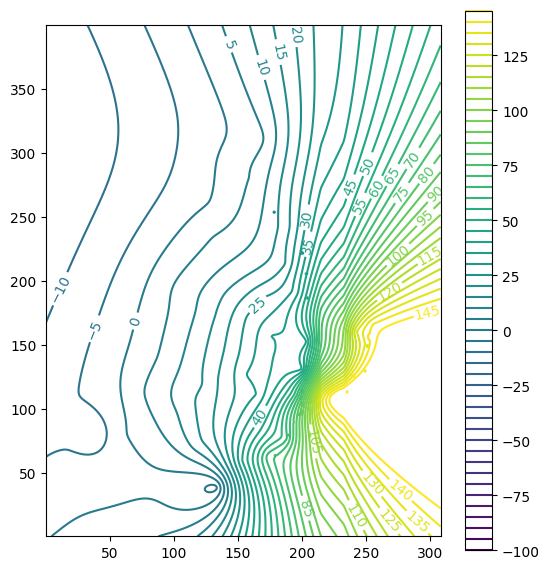

In [11]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
from matplotlib.animation import FuncAnimation

delc, delr = 1,1
Lx, Ly = 309, 400

layer = 0    #layer 1~7 (0~6)
h = []

plt.figure(figsize=(14, 7))
plt.subplot(1,2,1,aspect='equal')

levels = np.arange(-100,150,5)                             #等高線間隔
extent = (delr/2.0, Lx-delr/2.0, delc/2.0, Ly-delc/2.0)   #(x0,x1,y0,y1): (x0, y0),(x1, y1)=position of Z[0,0],Z[-1,-1]

CS = plt.contour(startingHd[layer,::-1,:],  levels=levels, extent=extent)   #等高線圖
plt.clabel(CS, inline=True, fontsize=10)
plt.colorbar()

In [12]:
path = 'choshui_original.bas'      #boundary檔
l=0
bound = []
layer = []
b = []

with open(path) as f:
    for line in f.readlines():
        if 'Layer' in line:
            l += 1
        
        elif l>0:
            s = line.split(' ')

            for j in s:
                if j != '' :
                    b.append(int(j)) 

            if len(b) >= 309:
                layer.append(b)
                b=[]

            if len(layer) >= 400:
                bound.append(layer)
                layer  =[]

            if len(bound) == 9:
                break


bound = np.array(bound)
print(bound.shape)

(9, 400, 309)


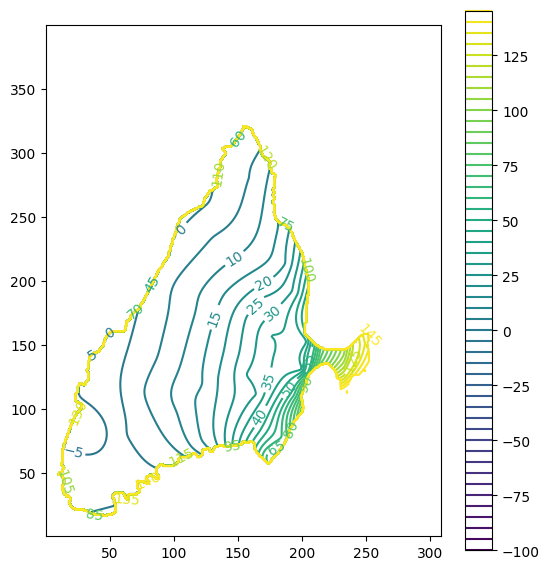

In [16]:
for i in range(len(bound[0])):
    for j in range(len(bound[0][0])):
        if bound[0][i][j] == 0:
            startingHd[0][i][j] = 999
            
plt.figure(figsize=(14, 7))
plt.subplot(1,2,1,aspect='equal')

levels = np.arange(-100,150,5)                             #等高線間隔
extent = (delr/2.0, Lx-delr/2.0, delc/2.0, Ly-delc/2.0)   #(x0,x1,y0,y1): (x0, y0),(x1, y1)=position of Z[0,0],Z[-1,-1]

CS = plt.contour(startingHd[0,::-1,:],  levels=levels, extent=extent)   #等高線圖
plt.clabel(CS, inline=True, fontsize=10)
plt.colorbar()

In [23]:
obs_wels = {'Yuanzhang':[82,82], 'Huwei':[109,131], 'Xigang':[175,74], 'Shiliu':[111,195], 
            'Shinmin':[148,238], 'Tianzhong':[170,195], 'Huatan':[246,177], 'Xihu':[213,151],
            'Xiluo':[145,145], 'Ganyuan':[156,174]}

for i , (o, xy) in enumerate(sorted(obs_wels.items())):
    print(i, o, startingHd[0][399-xy[0]][xy[1]])

0 Ganyuan 33.977
1 Huatan 13.39
2 Huwei 19.24
3 Shiliu 62.525000000000006
4 Shinmin 116.57
5 Tianzhong 39.900999999999996
6 Xigang 0.48343
7 Xihu 11.503
8 Xiluo 22.355999999999998
9 Yuanzhang 3.5556
